<a href="https://colab.research.google.com/github/JuanArchidona/Estadistica_Precios_Viviendas/blob/main/Juan_Archidona_exploratory_data_analysis_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center> Module 3 - Practical Statisctic - Problems </center>** 
![Immune](https://i.imgur.com/0TSSaqL.png)  

# Problem

For the following dataset, make a descriptive statistical analysis of each of the variables of the following dataset, to do this:

- Calculate all the statistics you consider necessary.
- Create some visualizations to support your analysis (boxplot, pairplots, etc)
- If applicable, indicate the possible distribution of the variables.
- Examinate the correlation of the variables among them as well as with the output variable (Diagnosis)
- If applicable, propose some transformation that can be applied to some variable and that improves the correlation.

  ### Import library

In [ ]:
# Manipulación de datos

import pandas as pd
from pandas import Series, DataFrame, read_csv
import numpy as np

# Visualización

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

### 1.- Load data

In [ ]:
!gdown https://drive.google.com/uc?id=17NuTD00JfJOPsQMjuFNJ9ocJjtAKLSdS

df_house = pd.read_csv("houses_Madrid.csv") 

Downloading...
From: https://drive.google.com/uc?id=17NuTD00JfJOPsQMjuFNJ9ocJjtAKLSdS
To: /content/houses_Madrid.csv
100% 7.83M/7.83M [00:00<00:00, 270MB/s]


## 2.- Exploratory Data Analysis (Data Understanding / Descriptive Analysis)

In [ ]:
df_house.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [ ]:
len(df_house)

21742

In [ ]:
df_house.dtypes

Unnamed: 0                        int64
id                                int64
title                            object
subtitle                         object
sq_mt_built                     float64
sq_mt_useful                    float64
n_rooms                           int64
n_bathrooms                     float64
n_floors                        float64
sq_mt_allotment                 float64
latitude                        float64
longitude                       float64
raw_address                      object
is_exact_address_hidden            bool
street_name                      object
street_number                    object
portal                          float64
floor                            object
is_floor_under                   object
door                            float64
neighborhood_id                  object
operation                        object
rent_price                        int64
rent_price_by_area              float64
is_rent_price_known                bool


In [ ]:
df_house.isna().sum()

Unnamed: 0                          0
id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by

En primer lugar vamos a determinar las diferentes variables de las que vamos a prescindir:
- Podemos desestimar las variables que identifican a las viviendas. Tales como id, title, subtitle... Ya que no aportan información relevante de la vivienda, ni de sus características.
- Descartamos los campos con todos sus valores nulos.
- Vamos a prescindir de otras features con un alto número de valores nulos. Y que se muestran como claramente prescindibles de cara a nuestro estudio. Tales como raw_adress, street name, street number, orientation...   

A continuación establecemos un nuevo dataset con las variables más influyentes. 

In [ ]:
df_house_previo = df_house[['buy_price','buy_price_by_area', 'sq_mt_built', 
                            'n_rooms', 'n_bathrooms', 'rent_price', 'is_renewal_needed', 
                            'has_parking', 'energy_certificate', 'neighborhood_id', 'house_type_id']]
df_house_previo.head(1)

,buy_price,buy_price_by_area,sq_mt_built,n_rooms,n_bathrooms,rent_price,is_renewal_needed,has_parking,energy_certificate,neighborhood_id,house_type_id
0,85000,1328,64.0,2,1.0,471,False,False,D,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,HouseType 1: Pisos


In [ ]:
df_house_previo.isna().sum()

buy_price               0
buy_price_by_area       0
sq_mt_built           126
n_rooms                 0
n_bathrooms            16
rent_price              0
is_renewal_needed       0
has_parking             0
energy_certificate      0
neighborhood_id         0
house_type_id         391
dtype: int64

### Limpieza de datos

Anteriormente hemos podido observar que hay tres variables con varios Na. Por lo que vamos a manipular sus valores según los siguientes criterios:

- Prescindimos de las viviendas que no cuenten con el valor de superficie construída. Ya que no aportan información relevante.
- Los valores nulos del campo tipo de vivienda son substituídos por el término "Misc" (miscelánea).
- Los valores nulos de la variable número de cuartos de baño son substituídos por su correspondiente estadístico moda.  

In [ ]:
df_house_sample = df_house_previo.copy()

df_house_sample = df_house_sample[df_house_sample['sq_mt_built'].notna()]

df_house_sample['house_type_id'] = df_house_sample['house_type_id'].fillna("Misc")
df_house_sample['n_bathrooms'] = df_house_sample['n_bathrooms'].fillna(df_house_sample['n_bathrooms'].mode()[0])

In [ ]:
df_house_sample.isna().sum()

buy_price             0
buy_price_by_area     0
sq_mt_built           0
n_rooms               0
n_bathrooms           0
rent_price            0
is_renewal_needed     0
has_parking           0
energy_certificate    0
neighborhood_id       0
house_type_id         0
dtype: int64

- Creamos otro dos campos. En los que almacenamos el nombre y la id del distrito correspondiente a cada vivienda. Cambiamos el tipo de la id de distrito a numérico.

- También extraemos el nombre, precio por m<sup>2</sup> e id de cada vecindario. A la vez que convertimos el tipo de sus valores numéricos.

In [ ]:
df_house_sample['district_id'] = df_house_sample['neighborhood_id']
df_house_sample['district_name'] = df_house_sample.district_id.map(lambda x : x.split(': ')[2].split("'")[0].strip())
df_house_sample['district_id'] = df_house_sample.district_id.str.extract(r'(District \d+)')
df_house_sample['district_id'] = df_house_sample.district_id.str.extract(r'(\d+)').astype(int)

df_house_sample['neighborhood_name'] = df_house_sample.neighborhood_id.map(lambda x : x.split(': ')[1].split('(')[0].strip())
df_house_sample['neighborhood_price/m2'] = df_house_sample.neighborhood_id.map(lambda x : x.split('(')[1].split(' €')[0].strip())
df_house_sample['neighborhood_price/m2'] = pd.to_numeric(df_house_sample['neighborhood_price/m2'], errors = 'coerce')
df_house_sample['neighborhood_id'] = df_house_sample.neighborhood_id.str.extract(r'(Neighborhood \d+)')
df_house_sample['neighborhood_id'] = df_house_sample.neighborhood_id.str.extract(r'(\d+)').astype(int)

df_house_sample.head(1)

,buy_price,buy_price_by_area,sq_mt_built,n_rooms,n_bathrooms,rent_price,is_renewal_needed,has_parking,energy_certificate,neighborhood_id,house_type_id,district_id,district_name,neighborhood_name,neighborhood_price/m2
0,85000,1328,64.0,2,1.0,471,False,False,D,135,HouseType 1: Pisos,21,Villaverde,San Cristóbal,1308.89


### Estimaciones de Localización / Cálculo de Estadísticos 

Vamos a dar un primer vistazo a la descripción estadística de las viviendas:

In [ ]:
df_house_sample.describe()

,buy_price,buy_price_by_area,sq_mt_built,n_rooms,n_bathrooms,rent_price,neighborhood_id,district_id,neighborhood_price/m2
count,2.161600e+04,21616.000000,21616.000000,21616.000000,21616.000000,2.161600e+04,21616.000000,21616.000000,21534.000000
mean,6.362840e+05,4027.133281,146.920892,2.979367,2.057781,-4.901605e+04,62.755551,9.743662,3803.667391
std,7.433188e+05,1910.074268,134.181865,1.466360,1.331878,8.621271e+05,38.440591,5.602859,1448.714620
min,3.600000e+04,447.000000,13.000000,0.000000,1.000000,-3.459028e+07,1.000000,1.000000,1308.890000
25%,1.980000e+05,2555.500000,70.000000,2.000000,1.000000,7.270000e+02,29.000000,5.000000,2443.620000
50%,3.700000e+05,3732.500000,100.000000,3.000000,2.000000,1.121000e+03,59.000000,9.000000,3810.080000
75%,7.500000e+05,5000.000000,162.000000,4.000000,2.000000,1.689000e+03,94.000000,14.000000,4807.690000
max,8.800000e+06,18889.000000,999.000000,24.000000,14.000000,2.517000e+03,135.000000,21.000000,8392.430000


A priori podemos establecer:

- **Que las medias del precio final de compra y por superficie son muy abultadas.**  
- **Una primera aproximación a la media habitaciones (3) y cuartos de baño (2) por vivienda.**
- Valores regulares para el precio de alquiler, superficie construída y precio del metro cuadrado por vecindario. 

A continuación vamos a calcular las medidas de tendencia central y que arrojan los resultados más relevantes. 


#### Media

Podemos entenderla como la suma de valores partida por el número de valores. 

- **Las medias del precio por piso y por superficie son muy elevadas.**

- **Ésto es debido a que hay viviendas muy costosas, que ocasionan un claro sesgo al alza en los valores.** 

In [ ]:
print("Media de precio de compra:", df_house_sample['buy_price'].mean(),
      "  Media de precio por superficie:", df_house_sample['buy_price_by_area'].mean())

Media de precio de compra: 636284.0233160622   Media de precio por superficie: 4027.1332809030346


#### Media Truncada

Nos permite marcar un porcentaje determinado de los valores ordenados, que queremos desestimar de cada extremo. Calculando la media de los resultantes.

- **Al deshacernos del 10% de los pisos más baratos y del 10% de los más caros, obtenemos una valor de media truncada de unos 478346 euros. Con una clara reducción de 168.000 euros respecto a la media.** 

- **Aplicando el mismo método al precio por superficie, obtenemos un valor de de media truncada de unos 3819 euros. Reflejando una clara reducción de 207 euros respecto a la media.** 


In [ ]:
from scipy.stats import trim_mean
print("Media recortada de precio de compra:", trim_mean(df_house_sample['buy_price'], 0.1), 
      "  Media recortada de precio por superficie:", trim_mean(df_house_sample['buy_price_by_area'], 0.1))

Media recortada de precio de compra: 478346.4409043599   Media recortada de precio por superficie: 3819.509598704753


#### Media ponderada

Se calcula multiplicando cada valor por un peso específico y dividiendo su suma por la suma de los pesos.
- **En nuestro caso es apropiada para asignar la relevancia del número de habitaciones o cuartos de baño. Y ver de que manera influye en el precio del piso o por superficie.**  

- En primer lugar vamos a crear dos nuevas columnas, en las que vamos a establecer los pesos según el número de habitaciones y cuartos de baño.

In [ ]:
df_house_sample['weight_n_rooms'] = df_house_sample.apply(lambda row: 1/row.n_rooms if row.n_rooms > 0 else 1, axis = 1)
df_house_sample['weight_n_bathrooms'] = df_house_sample.apply(lambda row: 1/row.n_bathrooms if row.n_bathrooms > 0 else 1, axis = 1)
df_house_sample.head(1)

,buy_price,buy_price_by_area,sq_mt_built,n_rooms,n_bathrooms,rent_price,is_renewal_needed,has_parking,energy_certificate,neighborhood_id,house_type_id,district_id,district_name,neighborhood_name,neighborhood_price/m2,weight_n_rooms,weight_n_bathrooms
0,85000,1328,64.0,2,1.0,471,False,False,D,135,HouseType 1: Pisos,21,Villaverde,San Cristóbal,1308.89,0.5,1.0


- **Las medias ponderadas del precio de la vivienda, según el número de habitaciones y cuartos de baño, son muy inferiores a la media calculada anteriormente.** 

- **También siguen siendo inferiores a la media truncada en un 10%.**

In [ ]:
print("Media ponderada de precio según número de habitaciones:", np.average(df_house_sample['buy_price'], 
                                                                            weights=df_house_sample['weight_n_rooms']))

Media ponderada de precio según número de habitaciones: 474325.9413825245


In [ ]:
print("Media ponderada de precio según número de cuartos de baño:",np.average(df_house_sample['buy_price'], 
                                                                              weights=df_house_sample['weight_n_bathrooms']))

Media ponderada de precio según número de cuartos de baño: 419598.8487615118


- **De igual manera, las medias ponderadas del precio por superficie, según el número de habitaciones y cuartos de baño, son muy inferiores a la media calculada anteriormente.** 

- **La media ponderada del precio por superficie, según el número de cuartos de baño, es inferior a la media truncada en un 10%.**

In [ ]:
print("Media ponderada de precio/superficie según número de habitaciones:", np.average(df_house_sample['buy_price_by_area'],
                                                                                       weights=df_house_sample['weight_n_rooms']))

Media ponderada de precio/superficie según número de habitaciones: 4083.154602293623


In [ ]:
print("Media ponderada de precio/superficie según número de cuartos de baño:", np.average(df_house_sample['buy_price_by_area'],
                                                                                          weights=df_house_sample['weight_n_bathrooms']))

Media ponderada de precio/superficie según número de cuartos de baño: 3750.504700917332


#### Mediana

Muestra el valor central de la serie de precios (o media de los dos valores centrales en el caso de una serie par). 

- **Las medianas del precio de los pisos (370.000 euros) y del m<sup>2</sup> (3732 euros) aportan valores mucho más realistas que sus medias. Con ajustes respectivos de unos 266.284 y 294 euros respecto a sus medias.**

- **Esto es debido a que no se encuentran tan condicionadas por los valores extremos. Ya que prescinde de los outliers, que inflaban sobremanera el valor de las medias.**

In [ ]:
print("Mediana de precio de compra", df_house_sample['buy_price'].median(),
      "  Mediana de precio por superficies", df_house_sample['buy_price_by_area'].median())

Mediana de precio de compra 370000.0   Mediana de precio por superficies 3732.5


#### Moda

Se trata del valor que aparece más frecuentemente dentro de una variable. Es un cálculo de uso común para clasificaciones categóricas. 

- No aporta información muy relevante para parámetros que pueden tener multitud de valores. Como el precio de los pisos o de la superficie. 

- Por ello vamos a calcularla para el número de habitaciones y cuartos de baño. Al mismo tiempo que para esclarecer cuales son los vecindarios y distritos que aportan más viviendas al estudio.  

In [ ]:
print("Moda del número de habitaciones:", df_house_sample['n_rooms'].mode().values,
      "  Moda del número de baños:", df_house_sample['n_bathrooms'].mode().values)
print("Vecindario con mayor número de viviendas:", df_house_sample['neighborhood_name'].mode().values,
      "  Distrito con mayor número de viviendas:", df_house_sample['district_name'].mode().values)

Moda del número de habitaciones: [3]   Moda del número de baños: [1.]
Vecindario con mayor número de viviendas: ['Malasaña-Universidad']   Distrito con mayor número de viviendas: ['Chamartín']


- **Cabe resaltar que la moda del número de baños (1.) es muy diferente de la media obtenida en la primera descripción de estadísticos (2.091687).**

- **Los resultados obtenidos podrían ser de gran ayuda. Para valorar las características de las viviendas con mayor demanda y de cara a una posible predicción.** 

### Estimaciones de Variabilidad

Procedemos a analizar la dispersión de los datos. Valorando cuán separados o juntos están los valores de la muestra. 

#### Desviación

Diferencia de cada valor respecto a la media muestral.

- No arroja valores muy deterministas sobre los precios o el resto de variables numéricas. 

- No se puede meter el listado completo en un informe.


In [ ]:
desviacion = df_house_sample['buy_price'] - df_house_sample['buy_price'].mean()
desviacion

0       -551284.023316
1       -506384.023316
2       -492037.023316
3       -526384.023316
4       -376284.023316
             ...      
21737   -286284.023316
21738   -211284.023316
21739     43715.976684
21740     58715.976684
21741   -212284.023316
Name: buy_price, Length: 21616, dtype: float64

#### Varianza

La podemos entender como la suma de todas las desviaciones elevadas al cuadrado dividido entre n-1. 

- En este caso tampoco puede aportar resultados relevantes para ninguna de nuestras variables. 

- En referencia a los precios, vendría a ser como una unidad de €<sup>2</sup>. Por lo que sólo tendría valor a nivel teórico.   

In [ ]:
from statistics import variance

print("Varianza del precio de las viviendas:", round(variance(df_house_sample['buy_price'])),
      "  Varianza del precio de la superficie:", round(variance(df_house_sample['buy_price_by_area'])))

Varianza del precio de las viviendas: 552522893264   Varianza del precio de la superficie: 3648384


#### Desviación Estándar

De forma muy abreviada, se puede definir como la raíz cuadrada de la varianza. 

- **Tiene gran importancia. Refleja muy bien la dispersión de las variables respecto a su media.** 

- **Su resultado tiene la misma unidad que el de las variables de referencia.** 

- **Por ejemplo en el caso del precio por superficie, ofrece un resultado de 1910 euros y que resulta ser muy útil. Ya que podríamos establecer que el precio por superficie de la mayoría de viviendas, se encuentra aproximadamente entre 2100 y 5900 euros.** 

In [ ]:
from statistics import stdev
from math import sqrt

print("Desviación típica del precio de las viviendas:", stdev(df_house_sample['buy_price']),
      "  Desviación típica del precio de la superfcie:", stdev(df_house_sample['buy_price_by_area']))

Desviación típica del precio de las viviendas: 743318.8368824377   Desviación típica del precio de la superfcie: 1910.0742677217318


#### Desviación Mediana Absoluta de la Mediana

Entendida como la mediana de los valores absolutos de desviación desde la mediana.

- Anteriormente hemos establecido que los valores de mediana del precio de las viviendas (370.000 euros) y por superficie (3732 euros) son muy aprovechables. Por lo que valorar la mediana de la separación absoluta de los valores respecto a su mediana también puede serlo. 

- Puede ser una gran referencia a la hora de valorar una distribución más realista del precio de las viviendas.

In [ ]:
from numpy import median, absolute
print("DMAM del precio de las viviendas", median(absolute(df_house_sample['buy_price'] - df_house_sample['buy_price'].median())))
print("DMAM del precio por superficie", median(absolute(df_house_sample['buy_price_by_area'] - df_house_sample['buy_price_by_area'].median())))

DMAM del precio de las viviendas 210000.0
DMAM del precio por superficie 1224.5


#### Rango Intercuartil

Nos indica la dispersión del 50% de nuestra muestra. 
- **Es de gran importancia dado que no suele estar muy influenciado por los outliers.**
- **Se considera una de las mejores medidas de variabilidad para
muestras sesgadas (distribuciones) o datos con valores atípicos. Que es justamente el caso en el que nos encontramos.**

In [ ]:
q3, q1 = np.percentile(df_house_sample['buy_price'], [75, 25])
IQR = q3 - q1
print("Rango Intercuartil Precio Vivienda:", IQR, "  3er Cuartil:", q3, "  1er Cuartil:", q1)

Rango Intercuartil Precio Vivienda: 552000.0   3er Cuartil: 750000.0   1er Cuartil: 198000.0


In [ ]:
q3, q1 = np.percentile(df_house_sample['buy_price_by_area'], [75, 25])
IQR2 = q3 - q1
print("Rango Intercuartil Precio Superficie:", IQR2, "  3er Cuartil:", q3, "  1er Cuartil:", q1)

Rango Intercuartil Precio Superficie: 2444.5   3er Cuartil: 5000.0   1er Cuartil: 2555.5


- **El rango intercuartil del precio por superficie arroja mejores resultados y más acotados que el precio por vivienda.** 

- Otras estimaciones como la desviación media absoluta o el rango no aportan información valiosa. Debido a que están condicionadas por el sesgo en el precio de las viviendas o por superficie. 

### Visualizaciones

Durante todo el análisis previo, hemos comprobado que algunas viviendas muy costosas distorsionan la distribución de los precios. Ocasionando un sesgo que incrementa la media del precio de las viviendas y por superficie. 

Procedemos a visualizar diferentes comparativas. Que permitan complementar el análisis y llegar a nuevas conclusiones.

- **En primer lugar visualizamos el conteo de los precios de vivienda y por superficie. Observamos un alto número de outliers, que quedan fuera de los cuartiles de precio más comunes.**


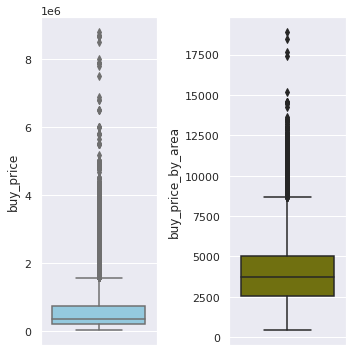

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = [5, 5])
                        
sns.boxplot(y = 'buy_price', data = df_house_sample, color = "skyblue",  ax = axs[0])
sns.boxplot(y = 'buy_price_by_area', data = df_house_sample, color = "olive", ax = axs[1])

fig.tight_layout()
plt.show()

También procedemos a cruzar el precio de las viviendas y por superficie:
- **La nube de puntos resultante está algo dispersa. Por lo que a priori no podemos establecer una correspondencia entre los dos tipos de precio.**

- **Sí que observamos una marcada agrupación según los tipos de vivienda Piso o Casa/Chalet.**

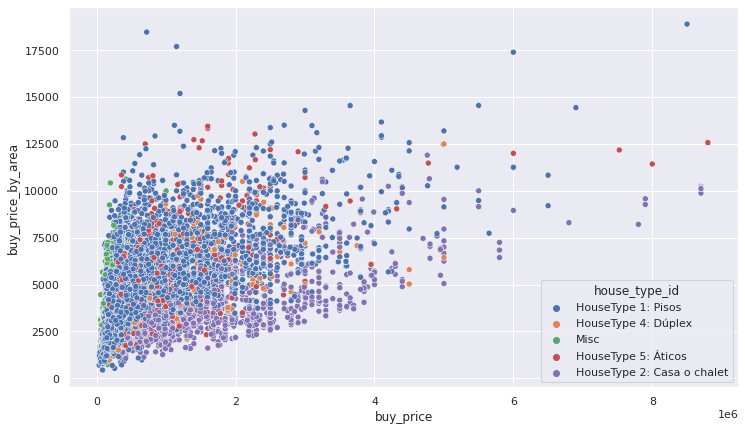

In [ ]:
fig, axs = plt.subplots(figsize = [12, 7])

sns.scatterplot(x = 'buy_price', y = 'buy_price_by_area', hue = 'house_type_id', data = df_house_sample)

plt.show();

Vamos a hacer otras comparaciones:

-  Vamos a cruzar el precio de vivienda con la superficie construída, tomando el tipo de vivienda como referencia adicional.

- **Podemos observar cierta linealidad en la distribución de los valores. Encontramos numerosos outliers dispersos por encima de un precio de 3 millones de euros o 600 m<sup>2</sup> de superficie construída.** 

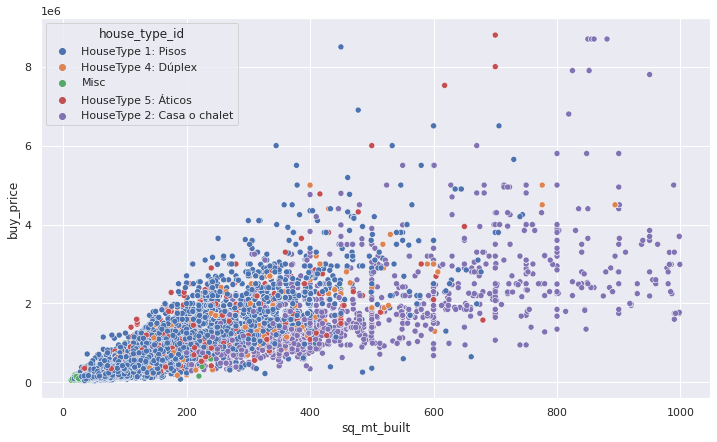

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7))

sns.scatterplot(x = 'sq_mt_built', y = 'buy_price', hue = 'house_type_id', data = df_house_sample)

plt.show();

- En la segunda vamos a cruzar el numéro de habitaciones, cuartos de baño y tipos de vivienda como referencia adicional.

- **También encontramos numerosos outliers dispersos por encima de un precio de 4 habitaciones y 4 cuartos de baño.** 

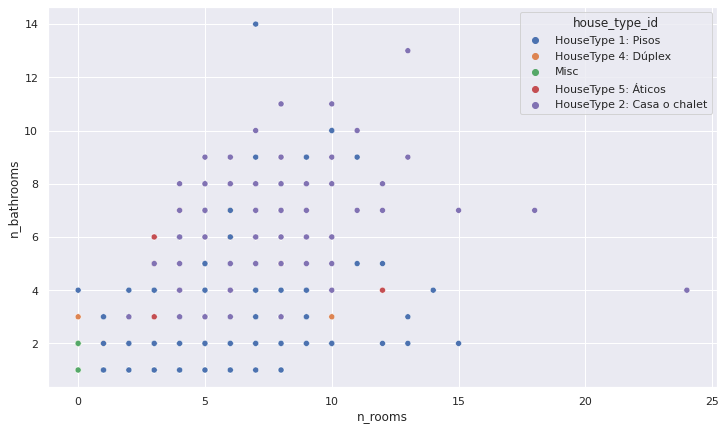

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.scatterplot(x = 'n_rooms', y = 'n_bathrooms', hue = 'house_type_id', data = df_house_sample)
plt.show()

**Debido a nuestras conclusiones, vamos a definir un nuevo dataset en el que prescindiremos de dichos outliers. Con el objetivo de alcanzar análisis y visualizaciones más realistas, que no estén sesgadas por las viviendas con características más extremas.**

In [ ]:
df_house_recortado = df_house_sample.copy()

df_house_recortado = df_house_recortado[df_house_recortado.buy_price <= 3000000]
df_house_recortado = df_house_recortado[df_house_recortado.sq_mt_built <= 600]
df_house_recortado = df_house_recortado[df_house_recortado.n_rooms <= 4 ]
df_house_recortado = df_house_recortado[df_house_recortado.n_bathrooms <= 4]

df_house_recortado.describe()

,buy_price,buy_price_by_area,sq_mt_built,n_rooms,n_bathrooms,rent_price,neighborhood_id,district_id,neighborhood_price/m2,weight_n_rooms,weight_n_bathrooms
count,1.846900e+04,18469.000000,18469.000000,18469.000000,18469.000000,18469.000000,18469.000000,18469.000000,18403.000000,18469.000000,18469.000000
mean,4.428172e+05,3905.091721,106.741567,2.553576,1.661162,-148.500460,63.683524,9.894418,3659.107314,0.466539,0.722427
std,4.029186e+05,1843.094726,61.818583,0.984673,0.763357,12425.206617,40.022931,5.851458,1420.867816,0.238191,0.278785
min,3.600000e+04,447.000000,13.000000,0.000000,1.000000,-266250.000000,1.000000,1.000000,1308.890000,0.250000,0.250000
25%,1.799900e+05,2439.000000,66.000000,2.000000,1.000000,791.000000,29.000000,5.000000,2284.480000,0.333333,0.500000
50%,3.050000e+05,3618.000000,90.000000,3.000000,2.000000,1140.000000,59.000000,9.000000,3607.130000,0.333333,0.500000
75%,5.500000e+05,4907.000000,128.000000,3.000000,2.000000,1644.000000,97.000000,15.000000,4572.450000,0.500000,1.000000
max,3.000000e+06,18462.000000,600.000000,4.000000,4.000000,2517.000000,135.000000,21.000000,8392.430000,1.000000,1.000000


In [ ]:
df_house_recortado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18469 entries, 0 to 21741
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   buy_price              18469 non-null  int64  
 1   buy_price_by_area      18469 non-null  int64  
 2   sq_mt_built            18469 non-null  float64
 3   n_rooms                18469 non-null  int64  
 4   n_bathrooms            18469 non-null  float64
 5   rent_price             18469 non-null  int64  
 6   is_renewal_needed      18469 non-null  bool   
 7   has_parking            18469 non-null  bool   
 8   energy_certificate     18469 non-null  object 
 9   neighborhood_id        18469 non-null  int64  
 10  house_type_id          18469 non-null  object 
 11  district_id            18469 non-null  int64  
 12  district_name          18469 non-null  object 
 13  neighborhood_name      18469 non-null  object 
 14  neighborhood_price/m2  18403 non-null  float64
 15  we

A continuación podemos observar la distribución de las viviendas, según su precio total y el de su superficie (el método 'rice' establece un número válido de contenedores). A pesar del recorte en el número de viviendas, seguimos observando:
- **Un claro acumulamiento de los precios de las viviendas en los valores más bajos.**
- **Distribuciones de precios sesgadas hacia los importes más altos.**
- **Aún así podemos establecer que el precio por superficie es una mejor referencia para nuestro análisis.**

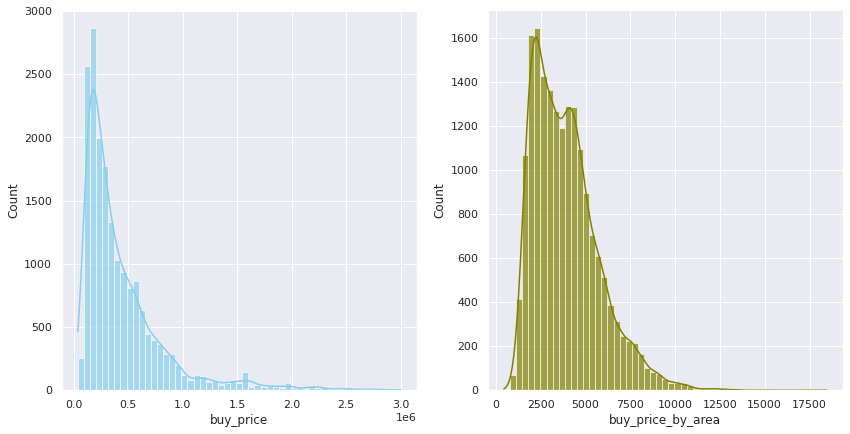

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.histplot(data = df_house_recortado, x = 'buy_price', kde = True, color = "skyblue", bins = 'rice', ax = axs[0], alpha = 0.7)
sns.histplot(data = df_house_recortado, x = 'buy_price_by_area', kde = True, color = "olive", bins = 'rice', ax = axs[1], alpha = 0.7)

plt.show();

Vamos a profundizar en el análisis de los precios a través del número de habitaciones y cuartos de baño. A simple vista (y antes de calcular la correlación entre variables) parece que pueden ser dos parámetros que influyan en la valoración de una vivienda.

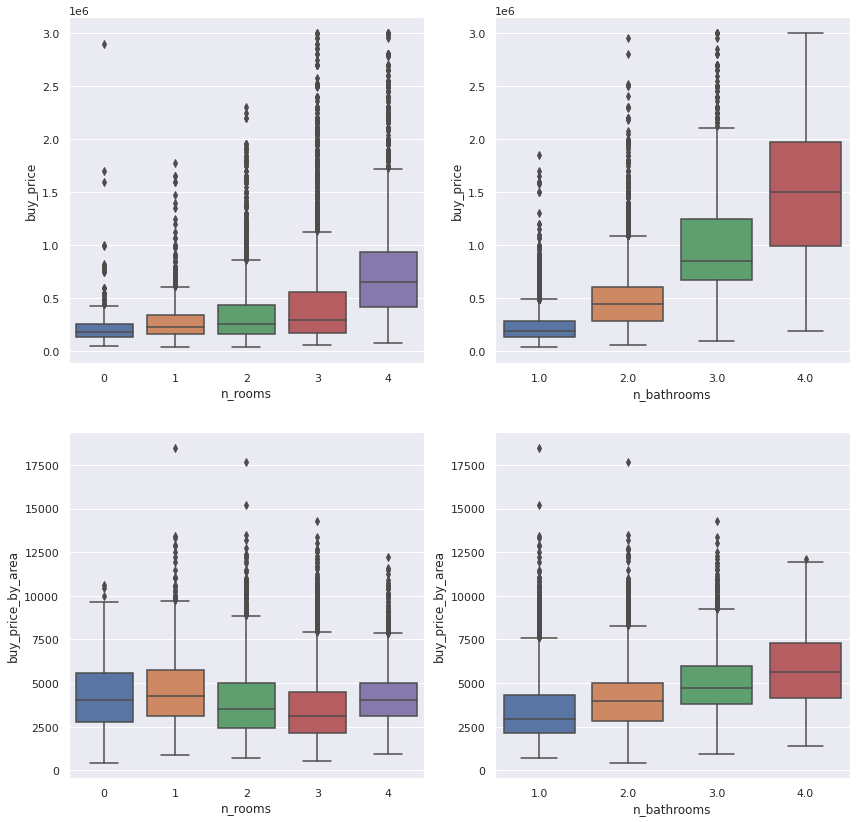

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

sns.boxplot(x = 'n_rooms', y = 'buy_price', data = df_house_recortado, ax = axs[0, 0])
sns.boxplot(x = 'n_bathrooms', y = 'buy_price', data = df_house_recortado, ax = axs[0, 1])
sns.boxplot(x = 'n_rooms', y = 'buy_price_by_area', data = df_house_recortado, ax = axs[1, 0])
sns.boxplot(x = 'n_bathrooms', y = 'buy_price_by_area', data = df_house_recortado, ax = axs[1, 1])

plt.show();

A partir de estas visualizaciones podemos establecer varias conclusiones:

**- El precio de la vivienda aumenta a la vez que el número de habitaciones y cuartos de baño. Seguimos reafirmándonos en que dicho precio podría guardar relación con la superficie total construída.**

**- El precio por superficie de un piso con una habitación es más caro que el del piso con dos habitaciones. Este hecho fija la base del precio por superficie en una vivienda con una única habitación. El incremento del número de habitaciones, no supone a su vez un incremento muy marcado del precio por superficie. E incluso puede ajustarlo a la baja, como es el caso de las viviendas con 2 o 3 habitaciones.**

**- Por el contrario y hasta cierto punto, un mayor número de cuartos de baño aumenta el precio por superficie de las viviendas.**  

A continuación vamos a visualizar un pairplot para ampliar nuestro análisis. 

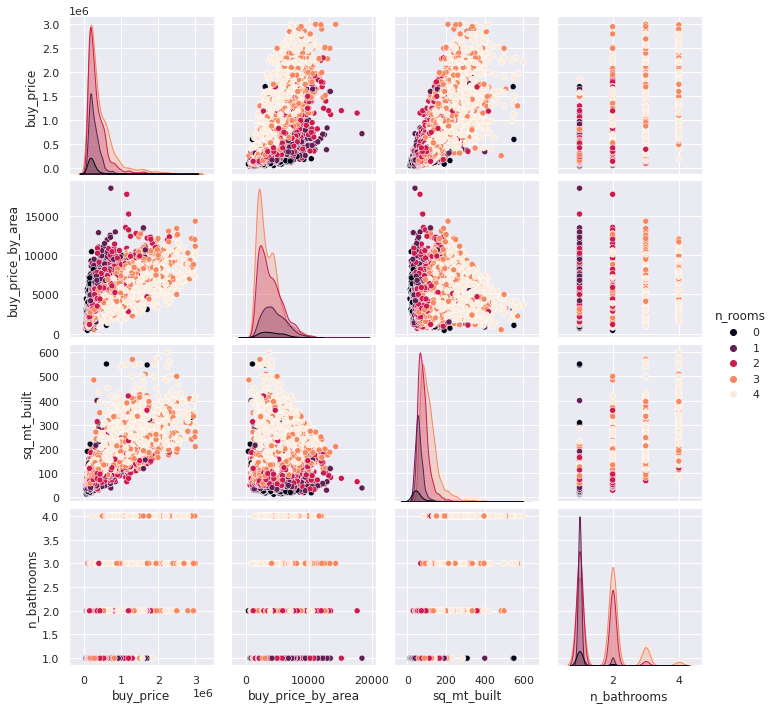

In [ ]:
sns.pairplot(df_house_recortado[['buy_price','buy_price_by_area', 'sq_mt_built','n_rooms','n_bathrooms']], palette = 'rocket', hue = 'n_rooms');

- A través de la diagonal del pairplot comprobamos que las distribuciones de los valores de cada variable, según el número de habitaciones, son muy similares en cuanto a sus proporciones.

- Tal y como destacamos anteriormente, observamos cierta linealidad entre el precio de la vivienda y su superficie construída. 

- Otras nubes de valores no muestran dicha linealidad. Pero no por ello podemos descartar la correlación de sus variables.

- Podemos observar cierta correspondencia entre el aumento del número de cuartos de baño y de habitaciones.

### Correlación entre variables 

- Se utiliza para comprobar la dependencia entre dos variables. Su valor siempre va a estar entre -1 y 1 porque su ecuación utiliza la suma de desviaciones estándar partida por la multiplicación de valores. 

- 0.7 y -0.7 comienzan a ser valores de correlación aceptables. 

Procedemos a calcular y visualizar la relación entre las variables objetivo (buy_price y buy_price_by_area) utilizando diferentes métodos y con un nuevo dataset recortado en variables. Complementariamente analizaremos si existe alguna correlación entre el resto de variables:

#### Método Pearson

- Es el que se utiliza por defecto al calcular la correlación entre variables. 
- **Volvemos a comprobar que el número de cuartos de baño y la superficie construída mantienen una gran correlación con el precio de las viviendas.**
- **Este método no establece ninguna correlación destacable con el precio por superficie.**
- **Otra correlación destacable es la marcada entre la superficie construída y el número de cuartos de baño.** 
 

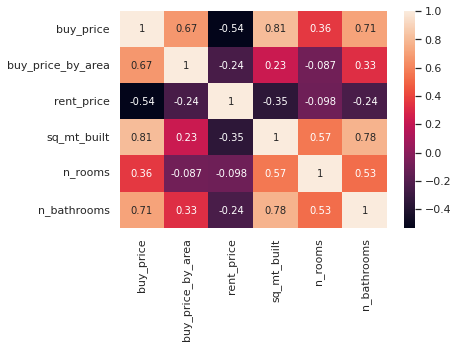

In [ ]:
df_house_recortado_2 = df_house_recortado.filter(['buy_price','buy_price_by_area','rent_price', 'sq_mt_built','n_rooms','n_bathrooms'])

corr = df_house_recortado_2.corr()

sns.heatmap(corr, annot = True);

#### Método Kendall-Tau

- Identifica los pares concordantes y discordantes de dos variables. Una vez identificados, se calculan los totales y se hace el cociente.
- Válido para funciones no monótonas (que sólo crecen o decrecen) y lineales.
- **Podemos afirmar que el precio del alquiler guarda una correlación notable con el precio final de la vivienda.**
- **Este método no establece ninguna correlación destacable con el precio por 
superficie.**
- **Podemos decir que no es el cálculo de correlación que arroje los valores más valiosos sobre las viviendas. Ésto puede ser debido a la multitud de factores que pueden influir sobre los precios. Y que impiden un crecimiento o decrecimiento constante entre parejas de valores.** 

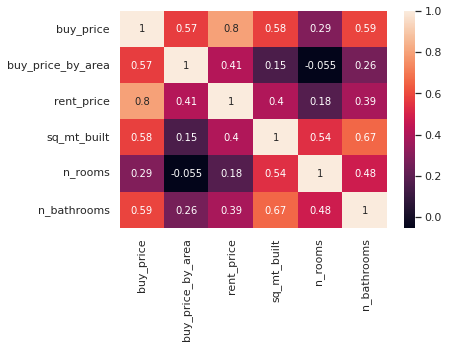

In [ ]:
corr = df_house_recortado_2.corr(method = 'kendall')

sns.heatmap(corr, annot = True);

#### Método Spearman

- Es similar al método Kendall, ya que también mide cualquier relación de carácter monótono.

- Es recomendable utilizarlo cuando los datos presentan valores extremos (como es nuestro caso), ya que dichos valores afectan mucho el coeficiente de correlación de Pearson, o ante distribuciones no normales. 

- **Este método nos muestra que el precio de la vivienda guarda una correlación destacable (de subida) con el precio por superficie, alquiler, superficie construída y número de cuartos de baño.**

- **Volvemos a comprobar la correlación notable que se establece entre el número de cuartos de baño y superficie construída.** 

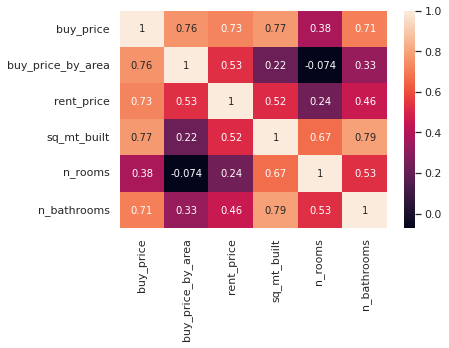

In [ ]:
corr = df_house_recortado_2.corr(method = 'spearman')

sns.heatmap(corr, annot = True);

### Distribución de Probabilidad

Se puede entender como una función que asigna a cada suceso definido sobre la variable, la probabilidad de que dicho suceso ocurra. 

Existen modelos para variables discretas y continuas. Pero la distribución normal es la que mejor se ajusta a nuestra población. Ya que permite crear modelos de muchísimas variables y fenómenos: 

- **Sus parámetros más importantes son la media y la desviación estándar.**
- **Es simétrica respecto al centro, o a la media.**
- **50% de los valores son mayores que la media, y 50% de los valores son menores que la media.**
- **La media es igual a la mediana y a la moda.**

A continuación vamos a calcular y visualizar la distribución normal de las variables más relevantes:

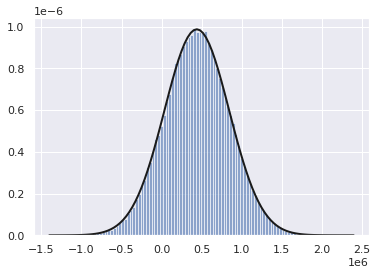

In [ ]:
from scipy.stats import norm
import statistics

mean = df_house_recortado['buy_price'].mean()
sd = stdev(df_house_recortado['buy_price'])

data = np.random.normal(mean, sd, 100000)

mu, sigma = norm.fit(data)
dist = norm.pdf(data, mean, sd)

plt.hist(data, bins = 100, density = True, alpha = 0.6, color = 'b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
dist = norm.pdf(x, mu, sigma)

plt.plot(x, dist, 'k', linewidth = 2)
plt.show;

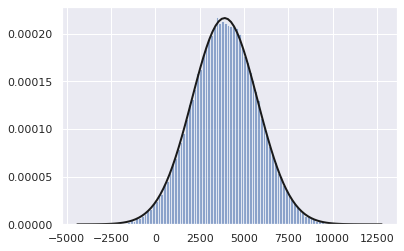

In [ ]:
mean = df_house_recortado['buy_price_by_area'].mean()
sd = stdev(df_house_recortado['buy_price_by_area'])

data = np.random.normal(mean, sd, 100000)

mu, sigma = norm.fit(data)
dist = norm.pdf(data, mean, sd)

plt.hist(data, bins = 100, density = True, alpha = 0.6, color = 'b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
dist = norm.pdf(x, mu, sigma)

plt.plot(x, dist, 'k', linewidth = 2)
plt.show;

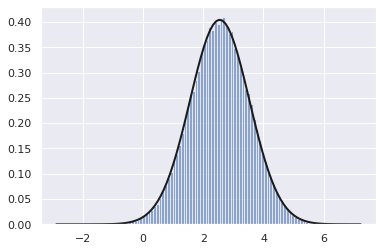

In [ ]:
mean = df_house_recortado['n_rooms'].mean()
sd = stdev(df_house_recortado['n_rooms'])

data = np.random.normal(mean, sd, 100000)

mu, sigma = norm.fit(data)
dist = norm.pdf(data, mean, sd)

plt.hist(data, bins = 100, density = True, alpha = 0.6, color = 'b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
dist = norm.pdf(x, mu, sigma)

plt.plot(x, dist, 'k', linewidth = 2)
plt.show;

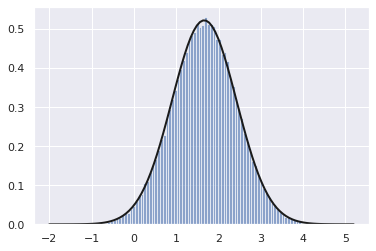

In [ ]:
mean = df_house_recortado['n_bathrooms'].mean()
sd = stdev(df_house_recortado['n_bathrooms'])

data = np.random.normal(mean, sd, 100000)

mu, sigma = norm.fit(data)
dist = norm.pdf(data, mean, sd)

plt.hist(data, bins = 100, density = True, alpha = 0.6, color = 'b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
dist = norm.pdf(x, mu, sigma)

plt.plot(x, dist, 'k', linewidth = 2)
plt.show;

### Teorema de Límite Central

Establece que dada una muestra aleatoria suficientemente grande de la población, la distribución de las medias muestrales seguirá una distribución normal. Aunque las variables originales no estén normalmente distribuídas.

El método de remuestreo Bootstrap nos permite aproximar la distribución en el muestreo de un estadístico. La repetición reiterada de este método sobre nuestros datos, nos permitirá acercarnos paulatinamente a lo establecido por el Teorema de Límite Central.

Vamos a visualizarlo:
- Aplicándolo a las variables más relevantes.
- Fijando el número de bins según el parámetro "rice", que genera menos contenedores que "sqrt". 

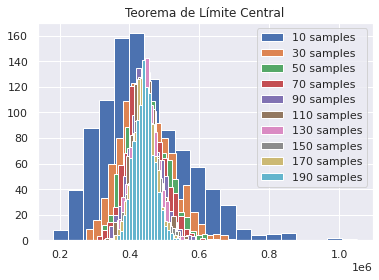

In [ ]:
sample_amounts = range(10, 200, 20)

for x in sample_amounts:
  samples = []
  for i in range (1000):
    samples.append(df_house_recortado['buy_price'].sample(x).mean())
  plt.hist(samples, bins = 'rice')
plt.legend([str(z) + ' samples' for z in sample_amounts])
plt.title("Teorema de Límite Central");

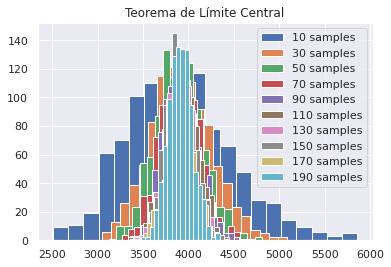

In [ ]:
sample_amounts = range(10, 200, 20)

for x in sample_amounts:
  samples = []
  for i in range (1000):
    samples.append(df_house_recortado['buy_price_by_area'].sample(x).mean())
  plt.hist(samples, bins = 'rice')
plt.legend([str(z) + ' samples' for z in sample_amounts])
plt.title("Teorema de Límite Central");

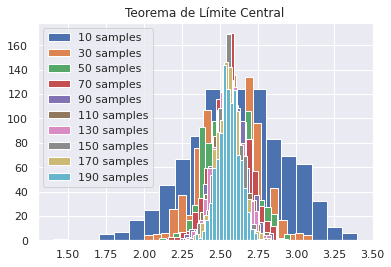

In [ ]:
sample_amounts = range(10, 200, 20)

for x in sample_amounts:
  samples = []
  for i in range (1000):
    samples.append(df_house_recortado['n_rooms'].sample(x).mean())
  plt.hist(samples, bins = 'rice')
plt.legend([str(z) + ' samples' for z in sample_amounts])
plt.title("Teorema de Límite Central");

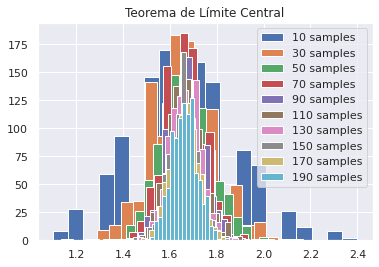

In [ ]:
sample_amounts = range(10, 200, 20)

for x in sample_amounts:
  samples = []
  for i in range (1000):
    samples.append(df_house_recortado['n_bathrooms'].sample(x).mean())
  plt.hist(samples, bins = 'rice')
plt.legend([str(z) + ' samples' for z in sample_amounts])
plt.title("Teorema de Límite Central");

Hemos comprobado como el remuestreo encamina nuestras variables (sesgadas inicialmente) hacia una distribución normal. De esta manera alcanzamos uno de los objetivos principales del análisis estadístico. 

### Análisis de la Varianza (ANOVA) 

Durante todo el análisis hemos tomado los valores de algunas variables como un conjunto cerrado y con los mismos estadísticos. Pero también podemos estudiar la correlación con otras variables adicionales, que a su vez pudieran segmentar los valores de la variable original. Podríamos decir que dicha separación tendría sentido, si a su vez provocara cambios en los estadísticos (como la media) de cada grupo de valores. 

Para ello contamos con ANOVA, que es una fórmula estadística que se utiliza para comparar las varianzas entre las medias (o el promedio) de diferentes grupos:

- **Permite comparar con variables categóricas.** 

- **Si la diferencia de media entre los grupos es abultada, podemos decir que dicha separación por grupos está justificada.** 
- **El parámetro p-valor marca la probabilidad o no de rechazar cierta hipótesis (hipótesis de nulo: la media de los grupos es la misma).** 

Vamos a establecer diferentes comparaciones de variables para estudiar su idoneidad. 

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as ss

In [ ]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

#### Estudio de Precio de la Vivienda Según el Tipo de Vivienda

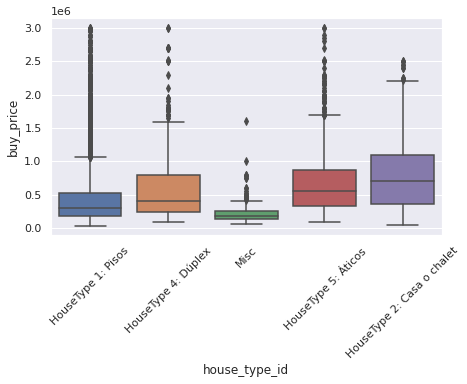

In [ ]:
fig, axs = plt.subplots(figsize=(7, 4))

axs = sns.boxplot(x = 'house_type_id', y = 'buy_price', data = df_house_recortado)
plt.xticks(rotation=45);

Comprobamos que el precio de la vivienda en funcíón del tipo de vivienda es algo variable. ¿Entonces es el tipo de vivienda una buena referencia para determinar su precio?.

In [ ]:
model = smf.ols('buy_price ~ house_type_id', data=df_house_recortado).fit()

print(model.summary())

aov_table = sm.stats.anova_lm(model)
print(aov_table)

                            OLS Regression Results                            
Dep. Variable:              buy_price   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     257.5
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          1.07e-215
Time:                        21:30:24   Log-Likelihood:            -2.6407e+05
No. Observations:               18469   AIC:                         5.282e+05
Df Residuals:                   18464   BIC:                         5.282e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Tomando como referencia la función B = B<sub>0</sub> + B<sub>1</sub>n_r<sub>0</sub> y los resultados de anteriores observamos que:

- Coeficiente intercept (B<sub>0</sub>) positivo y coeficientes house_type_id (B<sub>1</sub>) algo diversos.

- **Es una muestra de la variabilidad del precio de vivienda en función de su tipo. Marcada varianza entre grupos.**

- **El parámetro p-valor PR(>F) es muy inferior 0.05. Se trata de una fuerte evidencia en contra de la hipótesis. Por lo que podemos garantizar al 95% que esta diferenciación por grupos es válida.**

In [ ]:
ContinuousVariables=['sq_mt_built','buy_price_by_area','buy_price', 'rent_price', 'n_rooms', 'n_bathrooms', 'neighborhood_price/m2']
FunctionAnova(inpData = df_house_recortado, TargetVariable='house_type_id', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

sq_mt_built is correlated with house_type_id | P-Value: 0.0
buy_price_by_area is correlated with house_type_id | P-Value: 1.8662680447020986e-89
buy_price is correlated with house_type_id | P-Value: 1.0665672301198306e-215
rent_price is correlated with house_type_id | P-Value: 1.0464570618680232e-12
n_rooms is correlated with house_type_id | P-Value: 0.0
n_bathrooms is correlated with house_type_id | P-Value: 0.0
neighborhood_price/m2 is NOT correlated with house_type_id | P-Value: nan


['sq_mt_built',
 'buy_price_by_area',
 'buy_price',
 'rent_price',
 'n_rooms',
 'n_bathrooms']

**Podemos decir sin lugar a dudas, que el tipo de vivienda es una variable crucial a la hora de valorarla. Ya que está correlacionada con muchas otras variables.**

#### Estudio de Precio de la Vivienda Según el Distrito

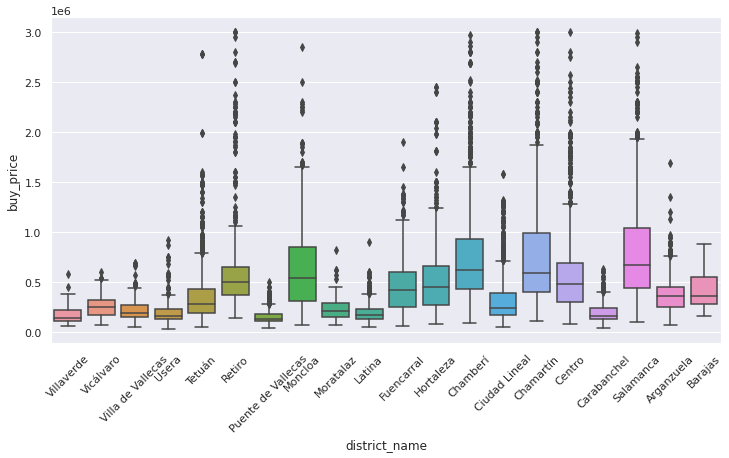

In [ ]:
fig, axs = plt.subplots(figsize=(12, 6))

axs = sns.boxplot(x = 'district_name', y = 'buy_price', data = df_house_recortado)
plt.xticks(rotation=45);

Comprobamos que el precio de la vivienda en funcíón del distrito es muy variable. ¿Entonces es el distrito una buena referencia para determinar el precio de la vivienda?.

In [ ]:
model = smf.ols('buy_price ~ district_name', data=df_house_recortado).fit()

print(model.summary())

aov_table = sm.stats.anova_lm(model)
print(aov_table)

                            OLS Regression Results                            
Dep. Variable:              buy_price   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     452.6
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:30:25   Log-Likelihood:            -2.6104e+05
No. Observations:               18469   AIC:                         5.221e+05
Df Residuals:                   18449   BIC:                         5.223e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Tomando como referencia la función B = B<sub>0</sub> + B<sub>1</sub>n_r<sub>0</sub> y los resultados anteriores observamos que:

- Coeficiente intercept (B<sub>0</sub>) positivo y coeficientes district_name (B<sub>1</sub>) muy diversos.

- **Es una muestra de la gran variabilidad del precio de vivienda en función del distrito. Gran varianza entre grupos.**

- **El parámetro p-valor PR(>F) es igual a 0. Se trata de una fuerte evidencia en contra de la hipótesis. Por lo que podemos garantizar al 95% que esta diferenciación por grupos es válida.**

In [ ]:
ContinuousVariables=['sq_mt_built','buy_price_by_area','buy_price', 'rent_price', 'n_rooms', 'n_bathrooms', 'neighborhood_price/m2']
FunctionAnova(inpData = df_house_recortado, TargetVariable='district_name', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

sq_mt_built is correlated with district_name | P-Value: 0.0
buy_price_by_area is correlated with district_name | P-Value: 0.0
buy_price is correlated with district_name | P-Value: 0.0
rent_price is correlated with district_name | P-Value: 5.711763692532544e-73
n_rooms is correlated with district_name | P-Value: 8.737204247584336e-183
n_bathrooms is correlated with district_name | P-Value: 0.0
neighborhood_price/m2 is NOT correlated with district_name | P-Value: nan


['sq_mt_built',
 'buy_price_by_area',
 'buy_price',
 'rent_price',
 'n_rooms',
 'n_bathrooms']

**Podemos decir sin lugar a dudas, que el distrito es una variable crucial a la hora de valorar una vivienda. Ya que está correlacionada con muchas otras variables.**

#### Estudio de Precio por Superficie Según el Número de Habitaciones

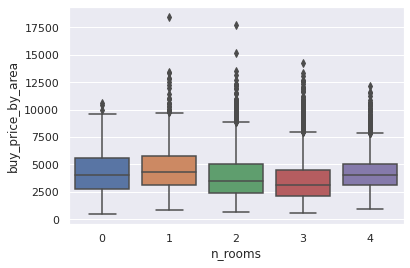

In [ ]:
axs = sns.boxplot(x = 'n_rooms', y = 'buy_price_by_area', data = df_house_recortado)

Comprobamos que el precio por superficie en funcíón del número de habitaciones es muy similar. ¿Entonces es el número de habitaciones una buena referencia para determinar dicho precio?.

In [ ]:
model = smf.ols('buy_price_by_area ~ n_rooms', data=df_house_recortado).fit()

print(model.summary())

aov_table = sm.stats.anova_lm(model)
print(aov_table)

                            OLS Regression Results                            
Dep. Variable:      buy_price_by_area   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           2.29e-32
Time:                        21:30:26   Log-Likelihood:            -1.6501e+05
No. Observations:               18469   AIC:                         3.300e+05
Df Residuals:                   18467   BIC:                         3.300e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4320.9198     37.554    115.059      0.0

Tomando como referencia la función B = B<sub>0</sub> + B<sub>1</sub>n_r<sub>0</sub> y los resultados anteriores observamos que:

- Coeficiente intercept (B<sub>0</sub>) positivo y coeficiente n_rooms (B<sub>1</sub>) negativo.

- **A medida que el número de habitaciones aumenta el precio por superficie disminuye.**

- **El parámetro p-valor PR(>F) es bastante menor que 0.05. Se trata de una fuerte evidencia en contra de la hipótesis. Por lo que podemos garantizar al 95% que esta diferenciación por grupos es válida.**

In [ ]:
ContinuousVariables=['sq_mt_built','buy_price_by_area','buy_price', 'rent_price', 'n_bathrooms', 'neighborhood_price/m2']
FunctionAnova(inpData = df_house_recortado, TargetVariable='n_rooms', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

sq_mt_built is correlated with n_rooms | P-Value: 0.0
buy_price_by_area is correlated with n_rooms | P-Value: 4.44399533872003e-151
buy_price is correlated with n_rooms | P-Value: 0.0
rent_price is correlated with n_rooms | P-Value: 6.1818771227366095e-56
n_bathrooms is correlated with n_rooms | P-Value: 0.0
neighborhood_price/m2 is NOT correlated with n_rooms | P-Value: nan


['sq_mt_built', 'buy_price_by_area', 'buy_price', 'rent_price', 'n_bathrooms']

**Podemos decir sin lugar a dudas, que el número de habitaciones es una variable crucial a la hora de valorar una vivienda. Ya que está correlacionada con muchas otras variables.**